In [4]:
#importing packages
import os
import h5py
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Activation, SpatialDropout2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [5]:
#training data directory and parameteres
trainDataGen = ImageDataGenerator(
                    rotation_range = 5,
                    width_shift_range = 0.1,
                    height_shift_range = 0.1,
                    rescale = 1.0/255,
                    shear_range = 0.2,
                    zoom_range = 0.2,		
                    horizontal_flip = False,
                    fill_mode = 'nearest',
                )

testDataGen = ImageDataGenerator(rescale=1.0/255,)


train_gen = trainDataGen.flow_from_directory(
                    "data/Train",
                    target_size=(32, 32),
                    color_mode="grayscale",
                    class_mode="categorical",
                    batch_size=32
                    )


Found 214602 images belonging to 108 classes.


In [6]:
#validation data directory and parameteres
val_gen = testDataGen.flow_from_directory(
                    "data/Test",
                    target_size=(32, 32),
                    color_mode="grayscale",
                    class_mode="categorical",
                    batch_size=32
                    )

Found 32400 images belonging to 108 classes.


In [7]:
#Adding CNN Layers
model = Sequential()

#Layer1 -------- 32 ----------------------------------------------------------
model.add(Convolution2D(filters = 32,kernel_size = (3,3),padding='same', activation = "relu",
            input_shape = (32,32,1)))

model.add(BatchNormalization())

model.add(SpatialDropout2D(0.4))

#Layer2 ---- 32 -------------------------------------------------------------
model.add(Convolution2D(filters = 32,kernel_size = (3,3), activation = "relu"))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

#strides=(2, 2),padding="same")

#Layers 3 ------- 64 -----------------------------------------------------------	
model.add(Convolution2D(filters = 64,kernel_size = (3,3),padding='same', activation = "relu"))

model.add(BatchNormalization())

model.add(SpatialDropout2D(0.4))

#Layer 4 --------- 64 --------------------------------------------------
model.add(Convolution2D(filters = 64,kernel_size = (3,3),activation = "relu"))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

#Layer 5 ---------- 128 -----------------------------------------------
model.add(Convolution2D(filters = 128,kernel_size = (3,3),padding='same',activation = "relu"))

model.add(BatchNormalization())

model.add(SpatialDropout2D(0.4))

#Layer 6 ---------- 128 ------------------------------------------------
model.add(Convolution2D(filters = 128,kernel_size = (3,3),activation = "relu"))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

#Flattening Data
model.add(Flatten())

#Adding hidden layers

#Hidden layer - 3
model.add(Dense(256,activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(100,activation = "relu"))

model.add(Dense(100,activation = "relu"))

model.add(Dense(100,activation = "relu"))

#Output Layer
model.add(Dense(108,activation = "softmax"))

In [8]:
# Compile the model
#opt = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
opt = tf.keras.optimizers.Adam()
model.compile(optimizer = opt,
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [9]:
#if no change in validation loss - learning rate will be decreased
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

In [10]:
mix_cnn = model.fit(
        train_gen,
        epochs = 30,
        steps_per_epoch = 6706,
        validation_data = val_gen,
        validation_steps = 1013
        )

Epoch 1/30
6706/6706 [==============================] - 458s 68ms/step - loss: 1.8229 - accuracy: 0.4499 - val_loss: 0.6677 - val_accuracy: 0.7540
Epoch 2/30
6706/6706 [==============================] - 189s 28ms/step - loss: 0.9743 - accuracy: 0.6657 - val_loss: 0.5414 - val_accuracy: 0.7915
Epoch 3/30
6706/6706 [==============================] - 195s 29ms/step - loss: 0.8484 - accuracy: 0.7047 - val_loss: 0.5004 - val_accuracy: 0.8026
Epoch 4/30
6706/6706 [==============================] - 191s 29ms/step - loss: 0.7842 - accuracy: 0.7239 - val_loss: 0.4947 - val_accuracy: 0.8083
Epoch 5/30
6706/6706 [==============================] - 205s 31ms/step - loss: 0.7434 - accuracy: 0.7365 - val_loss: 0.4623 - val_accuracy: 0.8166
Epoch 6/30
6706/6706 [==============================] - 209s 31ms/step - loss: 0.7118 - accuracy: 0.7473 - val_loss: 0.4570 - val_accuracy: 0.8213
Epoch 7/30
6706/6706 [==============================] - 197s 29ms/step - loss: 0.6949 - accuracy: 0.7526 - val_loss: 0

In [11]:
model.save("MixModel-79.h5")

In [12]:
#plotting graphs
%matplotlib inline
accu=mix_cnn.history['accuracy']
val_acc=mix_cnn.history['val_accuracy']
loss=mix_cnn.history['loss']
val_loss=mix_cnn.history['val_loss']

epochs=range(len(accu)) #No. of epochs



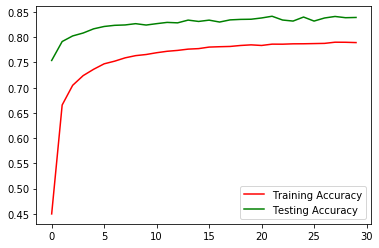

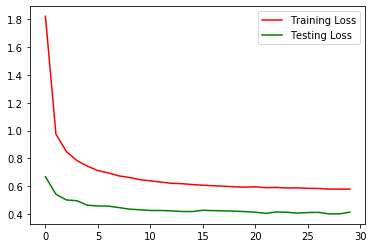

In [14]:
#plotting graphs
import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')

plt.savefig('training_accuracy_mix.png')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')

plt.savefig('training_loss_mix.png')
plt.legend()
plt.show()

